# Clustering Neural Networks

*This notebook is created with an aim to investigate the possibility to approach clustering problem using capabilities of ANN.*

## Settings

In [1]:
%reset -f

In [2]:
!pip install tensorflow==2.0

     |████████████████████████████████| 86.3MB 25.7MB/s eta 0:00:01     |█████████████████████████▌      | 68.8MB 54.9MB/s eta 0:00:01
     |████████████████████████████████| 3.8MB 45.6MB/s eta 0:00:01
     |████████████████████████████████| 14.6MB 18.7MB/s eta 0:00:01
     |████████████████████████████████| 71kB 32.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 11.4MB/s eta 0:00:01
     |████████████████████████████████| 450kB 20.9MB/s eta 0:00:01
     |████████████████████████████████| 61kB 11.7MB/s eta 0:00:01
     |████████████████████████████████| 798kB 48.3MB/s eta 0:00:01
     |████████████████████████████████| 92kB 22.4MB/s eta 0:00:01
     |████████████████████████████████| 163kB 52.3MB/s eta 0:00:01
     |████████████████████████████████| 51kB 11.6MB/s eta 0:00:01
     |████████████████████████████████| 153kB 13.2MB/s eta 0:00:01
     |████████████████████████████████| 81kB 28.6MB/s eta 0:00:01
ERROR: autoai-libs 1.10.5 has requirement pandas>=0.24.2, but you'

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import scipy 

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input

from tensorflow import keras as K
from tensorflow.keras import layers

In [4]:
tf.version

<module 'tensorflow_core._api.v2.version' from '/opt/conda/envs/Python36/lib/python3.6/site-packages/tensorflow_core/_api/v2/version/__init__.py'>

In [5]:
 # @hidden_cell
# The project token is an authorization token that is used to access project resources like data sources, connections, and used by platform APIs.
from project_lib import Project
project = Project(project_id='******************', project_access_token='******************')
pc = project.project_context


## Load data

In [6]:
# loading profiles.csv
f = project.get_file('profiles.csv')
profiles_raw = pd.read_csv(f)
profiles_raw.head()

,UID,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Challenge,Closeness,Curiosity,Excitement,...,Love,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence
0,89168924,0.672358,0.515518,0.202560,0.388493,0.952090,0.449133,0.491036,0.373575,0.361041,...,0.669498,0.527576,0.765530,0.314229,0.463151,0.362166,0.480516,0.437073,0.592248,0.485292
1,74580436,0.769577,0.442860,0.063138,0.152624,0.998766,0.792551,0.712586,0.726484,0.940915,...,0.964348,0.991403,0.998430,0.923608,0.908561,0.743416,0.608181,0.473193,0.882402,0.857386
2,52536879,0.445128,0.776801,0.899640,0.881138,0.706536,0.857511,0.842577,0.751038,0.759625,...,0.899586,0.529881,0.791273,0.899268,0.607543,0.917088,0.715703,0.825515,0.962015,0.753915
3,17243213,0.707812,0.725007,0.057476,0.296220,0.990815,0.551724,0.447475,0.519926,0.487398,...,0.542529,0.546406,0.840359,0.770971,0.740211,0.411759,0.566608,0.215377,0.478906,0.604419
4,278662460,0.659059,0.788241,0.708605,0.238162,0.566861,0.686579,0.331890,0.248036,0.528839,...,0.247863,0.619599,0.413212,0.747458,0.800460,0.741150,0.436434,0.685875,0.959131,0.235388


In [7]:
profiles_raw.drop(columns=['UID'], inplace=True)
profiles_raw.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Challenge,Closeness,Curiosity,Excitement,Harmony,...,Love,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence
0,0.672358,0.515518,0.202560,0.388493,0.952090,0.449133,0.491036,0.373575,0.361041,0.673358,...,0.669498,0.527576,0.765530,0.314229,0.463151,0.362166,0.480516,0.437073,0.592248,0.485292
1,0.769577,0.442860,0.063138,0.152624,0.998766,0.792551,0.712586,0.726484,0.940915,0.769730,...,0.964348,0.991403,0.998430,0.923608,0.908561,0.743416,0.608181,0.473193,0.882402,0.857386
2,0.445128,0.776801,0.899640,0.881138,0.706536,0.857511,0.842577,0.751038,0.759625,0.892253,...,0.899586,0.529881,0.791273,0.899268,0.607543,0.917088,0.715703,0.825515,0.962015,0.753915
3,0.707812,0.725007,0.057476,0.296220,0.990815,0.551724,0.447475,0.519926,0.487398,0.721506,...,0.542529,0.546406,0.840359,0.770971,0.740211,0.411759,0.566608,0.215377,0.478906,0.604419
4,0.659059,0.788241,0.708605,0.238162,0.566861,0.686579,0.331890,0.248036,0.528839,0.559211,...,0.247863,0.619599,0.413212,0.747458,0.800460,0.741150,0.436434,0.685875,0.959131,0.235388


In [8]:
profiles_raw.dropna(axis=0, inplace=True)
len(profiles_raw)

5437

In [9]:
big5traits = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Emotional range', 'Self-transcendence']
big5traits_class = big5traits.copy()
big5traits_class.append('Class')

## Autoencoder

In [10]:
def Auto_Encoder(input_shape, output_dim, activation='relu', dropout=0.13, summary=False):
    
    Input_Layer = Input(shape=input_shape)
    
    # Encoding
    Y = Dense(10, activation=activation)(Input_Layer)
    Y = Dropout(dropout)(Y)
    
    Y = Dense(5, activation=activation)(Y)
    Y = Dropout(dropout)(Y)
    
    # Bottleneck layer
    Encoder = Dense(output_dim, activation=activation, name='bottleneck')(Y)
    
    # Decoding
    Y = Dense(5, activation=activation)(Encoder)
    Y = Dropout(dropout)(Y)
    
    Y = Dense(10, activation=activation)(Y)
    Y = Dropout(dropout)(Y)
    
    Output_Layer = Dense(input_shape[0], activation=activation)(Y)
    
    model = Model(inputs=Input_Layer, outputs=Output_Layer)
    
    if summary:
        print(model.summary())
        
    return model

In [11]:
new_dim = 2
CHOSEN_TRAITS = ['F_{:d}'.format(i) for i in range(new_dim)]
CHOSEN_TRAITS

['F_0', 'F_1']

In [12]:
autoencoder = Auto_Encoder((22, ), new_dim, activation='sigmoid',summary=True)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 12        
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 15    

In [13]:
autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.MSE)

In [14]:
X = profiles_raw.to_numpy()
X = np.round(X, 3)
X

array([[0.672, 0.516, 0.203, ..., 0.437, 0.592, 0.485],
       [0.77 , 0.443, 0.063, ..., 0.473, 0.882, 0.857],
       [0.445, 0.777, 0.9  , ..., 0.826, 0.962, 0.754],
       ...,
       [0.542, 0.319, 0.17 , ..., 0.561, 0.372, 0.836],
       [0.643, 0.743, 0.12 , ..., 0.477, 0.687, 0.86 ],
       [0.585, 0.481, 0.468, ..., 0.66 , 0.876, 0.638]])

In [15]:
autoencoder.fit(X, X,
            epochs=100,
            batch_size=128,
            shuffle=True,
            validation_split=0.2)

Train on 4349 samples, validate on 1088 samples
Epoch 1/100
4349/4349 [==============================] - 2s 478us/sample - loss: 0.0850 - val_loss: 0.0821
Epoch 2/100
4349/4349 [==============================] - 0s 57us/sample - loss: 0.0789 - val_loss: 0.0794
Epoch 3/100
4349/4349 [==============================] - 0s 62us/sample - loss: 0.0758 - val_loss: 0.0784
Epoch 4/100
4349/4349 [==============================] - 0s 59us/sample - loss: 0.0741 - val_loss: 0.0778
Epoch 5/100
4349/4349 [==============================] - 0s 56us/sample - loss: 0.0731 - val_loss: 0.0776
Epoch 6/100
4349/4349 [==============================] - 0s 53us/sample - loss: 0.0726 - val_loss: 0.0776
Epoch 7/100
4349/4349 [==============================] - 0s 57us/sample - loss: 0.0723 - val_loss: 0.0776
Epoch 8/100
4349/4349 [==============================] - 0s 63us/sample - loss: 0.0719 - val_loss: 0.0775
Epoch 9/100
4349/4349 [==============================] - 0s 63us/sample - loss: 0.0718 - val_loss: 0.07

In [16]:
encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)

In [17]:
data_red = encoder.predict(X)

In [18]:
profiles = pd.DataFrame(data_red, columns=CHOSEN_TRAITS)
profiles.head()

,F_0,F_1
0,0.631304,0.579980
1,0.978690,0.046205
2,0.973098,0.058202
3,0.679495,0.526256
4,0.585350,0.626754


In [19]:
profiles.describe()

,F_0,F_1
count,5437.000000,5437.000000
mean,0.523694,0.612070
std,0.290197,0.289251
min,0.021914,0.014239
25%,0.337803,0.463620
50%,0.521947,0.684797
75%,0.730731,0.813898
max,0.993388,0.987970


## Clustering Layer

In [20]:
class Clustering(K.layers.Layer):
    """
    
    # Description
    Custering layer transforms input to a soft vector.
    
    # Arguments
    nb_clusters - number of clusters to identify 
    
    # Input 
    2D tensor of shape (nb_instances, nb_features)
    
    # Output 
    2D tensor of shape (nb_instances, nb_clusters)
       
    """
    
    def __init__(self, nb_clusters, weights=None, ddof=1.0, **kwargs):
        
        if 'input_shape' not in kwargs and 'input_dim' in kwargs:
            kwargs['input_shape'] = (kwargs.pop('input_dim'),)
            
        super(Clustering, self).__init__(**kwargs)
        self.nb_clusters = nb_clusters
        self.nu = ddof
        self.initial_weights = weights
        self.input_spec = K.layers.InputSpec(ndim=2)
    
    def build(self, input_shape):
        
        assert len(input_shape) == 2, "input_shape must be 2D; flatten the input first."
        
        input_dim = input_shape[1]
        self.input_spec = K.layers.InputSpec(dtype=K.backend.floatx(), shape=(None, input_dim))
        
        self.clusters = self.add_weight(shape=(int(self.nb_clusters), int(input_dim)), trainable = True,
                                        initializer='glorot_uniform', name='clusters')
        
        # checking if weight is given during init
        if self.initial_weights is not None:
            self.set_weights(self.initial_weights)
            del self.initial_weights
            
        self.built = True
        
    def call(self, inputs):
        
        """ 
        student t-distribution, same as used in t-SNE algorithm.        
                 q_ij = 1/(1+dist(x_i, µ_j)^2), then normalize it.
                 q_ij can be interpreted as the probability of assigning sample i to cluster j.
                 (i.e., a soft assignment)
        Arguments:
            input 2D tensor of shape (n_samples, n_features)
        Return:
            q: student's t-distribution, or soft labels for each sample. shape=(n_samples, n_clusters)
        """
        
        q = 1.0 / (1.0 + (K.backend.sum(K.backend.square(K.backend.expand_dims(inputs, axis=1) - self.clusters), axis=2) / self.nu))
        q **= (self.nu + 1.0) / 2.0
        q = K.backend.transpose(K.backend.transpose(q) / K.backend.sum(q, axis=1)) # Normalization
        return q
    
    def compute_output_shape(self, input_shape):
        assert input_shape and len(input_shape) == 2
        return input_shape[0], self.nb_clusters

## Auxilary Functions

In [21]:
def Davies_Bouldin_index(df, cats, cluster_cores, distance, order=1):
    
    n = len(cluster_cores)
    sigmas = np.zeros(n)
    
    # average intra-cluster distances
    for i, cc in enumerate(cluster_cores):
        sigmas[i] = np.mean(df[df[cats] == i].apply(lambda row: distance(row[:-1], cluster_cores[i], k=order), axis=1))
    
    # max intra-inter relations
    dists = [np.max([(sigmas[i] + sigmas[j])/distance(cluster_cores[i], cluster_cores[j], order) for j in range(n) if i != j]) for i in range(n)]
    return np.mean(dists)
    

In [22]:
def Distribution_distance(x, mean, cov):
    n = len(mean)
    stds = np.array([[cov[i, j] for j in range(n) if i == j][0] for i in range(n)])
    
    return scipy.linalg.norm(np.divide(np.abs(x-mean), stds))

def Mahalanobis_distance(x, mean, inv_cov):
    return (x-mean).T@inv_cov@(x-mean)

def softmax(z):
    return np.exp(z)/np.sum(np.exp(z))

def minmax_scaling(z):
    return (z - np.min(z))/(np.max(z) - np.min(z))

In [23]:
def Davies_Bouldin_Mahalanobis(df, cats, cluster_cores, inv_cov):
    
    n = len(cluster_cores)
    sigmas = np.zeros(n)
    if len(inv_cov.shape) == 2:
        ic = inv_cov.copy()
        inv_cov = np.zeros((n, ic.shape[0], ic.shape[1]))
        for i in range(n):
            inv_cov[i] = ic.copy()
            
    # average intra-cluster distances
    for i, cc in enumerate(cluster_cores):
        sigmas[i] = np.mean(df[df[cats] == i].apply(lambda row: Mahalanobis_distance(row[:-1], cc, inv_cov[i]), axis=1))
    
    # max intra-inter relations
    dists = [np.max([(sigmas[i] + sigmas[j])/Mahalanobis_distance(cluster_cores[i], cluster_cores[j], inv_cov[j]) for j in range(n) if i != j]) for i in range(n)]
    return np.mean(dists)

In [24]:
def boxplot(param, cats, data, ax=None):
    if not ax:
        fig, (ax) = plt.subplots(1, 1, figsize=(12, 4))
        fig.suptitle('A box plot', fontsize=14)

    sns.boxplot(x=cats, y=param, data=data,  ax=ax, orient='v')
    ax.set_xlabel("{:s}".format(param),size = 12,alpha=0.8)
    ax.set_ylabel(param,size = 12,alpha=0.8)

In [25]:
def radar_plot(data, traits, COLOR='coral', 
               title=None, ax=None, labeled=None, 
               drop_xticks=False, drop_yticks=False):
    N = len(traits)
    # arclength from 0 up to this point (i)
    angles = [2*np.pi*i/N for i in range(N)]
    
    if not ax:
        fig = plt.figure(figsize=(10, 10))
        ax = plt.subplot(111, polar=True)

    # structure
    ax.set_xticks(angles)
    plt.xticks(angles, traits)
    ax.set_yticks([0, 0.2, 0.5, 0.8, 1.0])
    ax.set_thetalim(0, 2*np.pi)
    ax.tick_params(direction='out', labelsize=12, colors='black',
               grid_color='dimgrey', grid_alpha=0.8, labelrotation='auto')
    
    if drop_xticks:
        plt.tick_params(
                axis='both',    
                which='both',      # both major and minor ticks are affected
                bottom=False,      # ticks along the bottom edge are off
                top=False,         # ticks along the top edge are off
                labelbottom=False) # labels along the bottom edge are off
    
    if drop_yticks:
        ax.set_yticks([])

    # duplicating first point to close the circle
    data = np.append(data, data[0])
    angles.append(angles[0])
    
    if title:
        ax.set_title(title, fontsize=12)
    
    ax.plot(angles, data, color=COLOR, linewidth=3, label=labeled)
    ax.plot(angles, data, color=COLOR, linewidth=5, alpha=0.1)
    ax.plot(angles, data, color=COLOR, linewidth=8, alpha=0.5)
    ax.fill(angles, data, alpha=0.23, color=COLOR);
    

In [26]:
def Silhouette_from_scratch(df, distance, inv_covs=None):
    
    X = df.to_numpy()
    labels = X[:, -1]
    X = X[:, :-1]
    
    # computing sizes of C_i
    cluster_codes, cluster_lengths = np.unique(labels, return_counts=True)
    cluster_sizes = {c:cluster_lengths[i] for i, c in enumerate(cluster_codes)}
    
    # creating a resulting array
    sil = np.zeros_like(labels)
    subsets = {c:X[labels == c] for c in cluster_codes}
    
    if distance == 'l2':
        # mean distance to kindred
        ai = np.array([np.sum([np.linalg.norm(X[i] - kindred) for kindred in subsets[labels[i]]])/(cluster_sizes[labels[i]]-1) for i in range(len(X))])
        
        # smallest distance to other clusters
        bi = np.array([np.min([np.sum([np.linalg.norm(X[i] - other) for other in subsets[K]])/cluster_sizes[K] for K in cluster_codes if K != labels[i]]) for i in range(len(X))])
        
        # silhouette coefficient
        sil = (bi - ai)/np.max([ai, bi], axis=0)
        
    
    return sil

In [27]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

In [28]:
def silhouette_evaluation(df, plot=True, distance='l2',samples_per_class=50, cmap='hsv', verbose=True):
    
    X = df.to_numpy()
    labels = X[:, -1]
    X = X[:, :-1]
    cluster_codes, cluster_lengths = np.unique(labels, return_counts=True)
    
    sil = silhouette_samples(X, labels, metric=distance)
    sil_score = silhouette_score(X, labels, metric=distance)
    
    res_df = pd.DataFrame(np.stack([labels, sil], axis=1), columns=['Class', 'Silhouette'])
    sil_means = res_df.groupby('Class').mean()
    
    if verbose:
        print('Silhouette quality of each cluster:')
        print(sil_means)
        print('Silhouette score of the clustering is: ', sil_score)
    if plot:
        sample_df = pd.DataFrame(columns=['Class', 'Silhouette'])
        ax_labels = []
        
        for cat in cluster_codes:
            sample_df = pd.concat([sample_df, res_df[res_df['Class'] == cat].sample(samples_per_class)])
            ax_labels.append("Cluster {:d}".format(int(cat)))
            
        # Create a color palette:
        my_palette = plt.cm.get_cmap(cmap, len(cluster_codes))
        sam = sample_df.to_numpy()
        sam_class = sam[:, 0]
        sam_sil = sam[:, 1]
        
        fig, ax = plt.subplots(figsize=(15, 20))
        plt.title('Silhouette values', fontsize=20)
        
        plt.barh(y=np.arange(0, len(sam_sil)), width=sam_sil, edgecolor='k',
                 color=my_palette(sam_class/np.max(sam_class)))
        
        ax.set_yticks(cluster_codes*samples_per_class + samples_per_class//2)
        ax.set_yticklabels(ax_labels, fontsize=13, rotation='vertical')
        ax.invert_yaxis()  # labels read top-to-bottom
        ax.set_xlabel('Silhouette', fontsize=15)              
        
        
    return res_df, sil_means, sil_score
    
    

## Cluster tendency
*The Hopkins statistic (introduced by Brian Hopkins and John Gordon Skellam) is a way of measuring the cluster tendency of a data set.*

`ref.:  Hopkins, Brian; Skellam, John Gordon (1954). "A new method for determining the type of distribution of plant individuals". Annals of Botany. Annals Botany Co. 18 (2): 213–227.`

In [29]:
def Lk_norm(point1, point2, k=2):
    
    n = len(point1)
    return np.power(np.sum([np.abs(point1[i] - point2[i])**k for i in range(n)]), 1/k)
    
def Hopkins_statistic(df, distance, n=100, m = 3):
    
    d = df.shape[1]
    sample = df.sample(n=n, axis=0).to_numpy()
    rd = np.random.uniform(size=(m, d))
    
    # u_i
    outer_dist = [np.min([distance(rd[i], sample[j], k=1) for j in range(n)]) for i in range(m)]
    # w_i
    inner_dist = [np.min([distance(sample[i], sample[j], k=1) for j in range(n) if i != j]) for i in range(m)]
    
    return np.sum(np.power(outer_dist, d)) / (np.sum(np.power(outer_dist, d)) + np.sum(np.power(inner_dist, d)))

In [30]:
for i in range(10):
    print(Hopkins_statistic(profiles, Lk_norm, m=50))

0.9987279884462165
0.9983339365659312
0.9988854192956649
0.9971677352720121
0.9981461092986256
0.9980580958325715
0.9977633192211246
0.9992503185424639
0.998701784111868
0.9991651143329892


***Comment:*** It seems that our data has high tendency to being clusterized.

## K-means baseline approach

### Model

In [31]:
from sklearn.cluster import KMeans

In [32]:
data = profiles.to_numpy()
data.shape

(5437, 2)

In [33]:
# small n_clusters
start_time = time.time()
kmeans = KMeans(n_clusters=4, random_state=0, algorithm='auto',
               max_iter=500, n_init=50).fit(data)
print("Took {:.2f} seconds.".format(time.time() - start_time))

Took 5.76 seconds.


In [34]:
cat = kmeans.labels_
df = profiles.copy()
df_raw = profiles_raw.copy()
df['Class'] = cat
df_raw['Class'] = cat
df.head()

,F_0,F_1,Class
0,0.631304,0.579980,3
1,0.978690,0.046205,1
2,0.973098,0.058202,1
3,0.679495,0.526256,3
4,0.585350,0.626754,0


/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


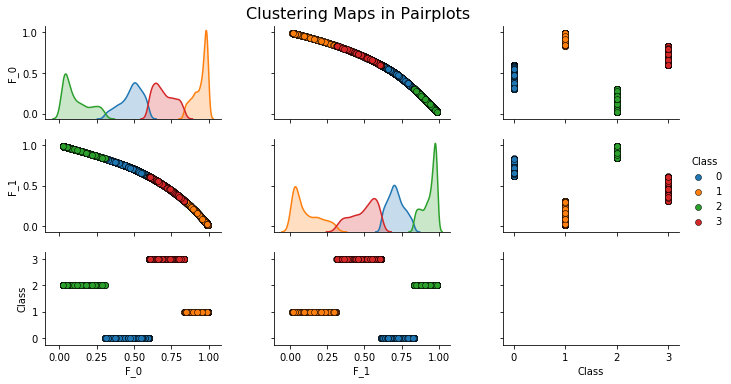

In [35]:
pp = sns.pairplot(df, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

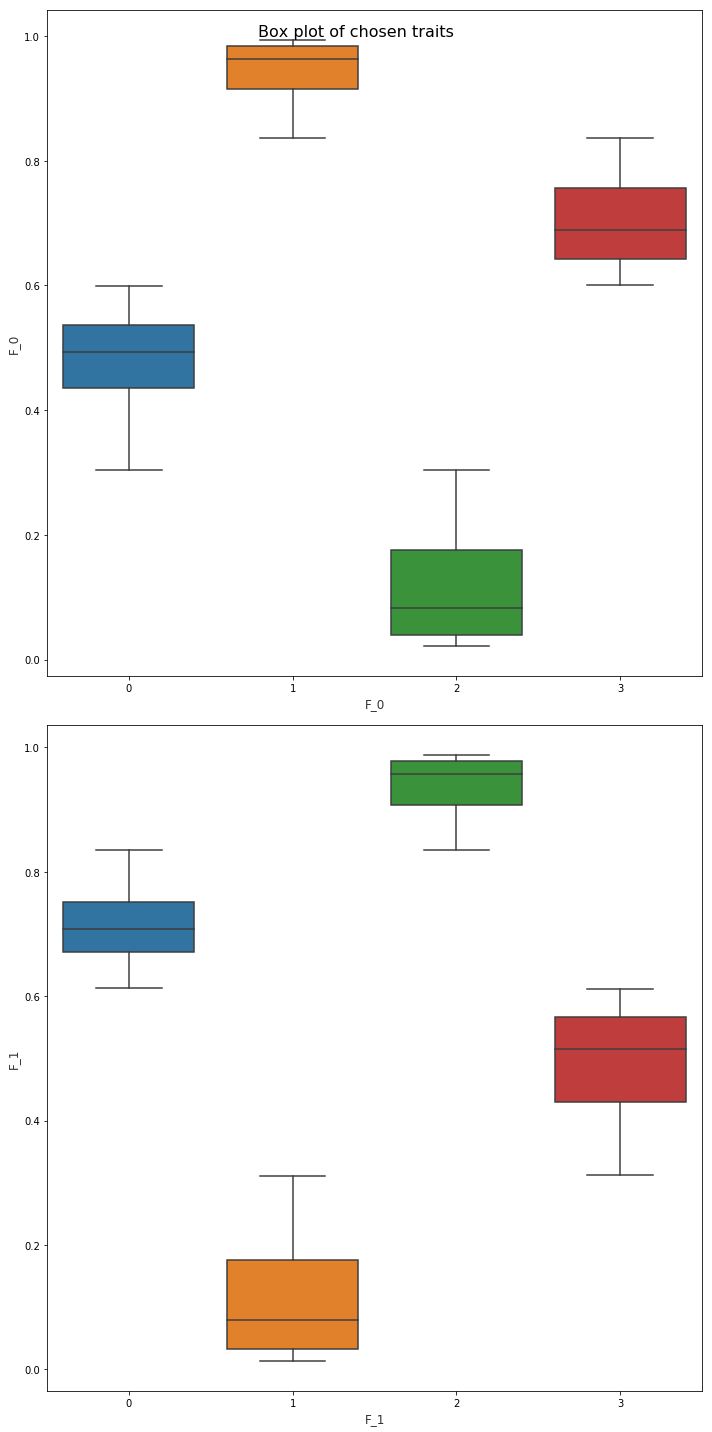

In [36]:
fig, axs = plt.subplots(len(df.columns[:-1]), 1, figsize=(10, 20))
fig.suptitle('Box plot of chosen traits', fontsize=16)

for i, trait in enumerate(df.columns[:-1]):
    boxplot(trait, 'Class', df, axs[i])
    
plt.tight_layout()

### Evaluation

In [37]:
cluster_cores = kmeans.cluster_centers_

In [38]:
Davies_Bouldin_index(df, 'Class', cluster_cores, Lk_norm)

0.4569917350393967

In [39]:
cores = pd.DataFrame(cluster_cores, columns=df.columns[:-1])
cores

,F_0,F_1
0,0.482245,0.712433
1,0.946501,0.109467
2,0.114073,0.939231
3,0.700298,0.496105


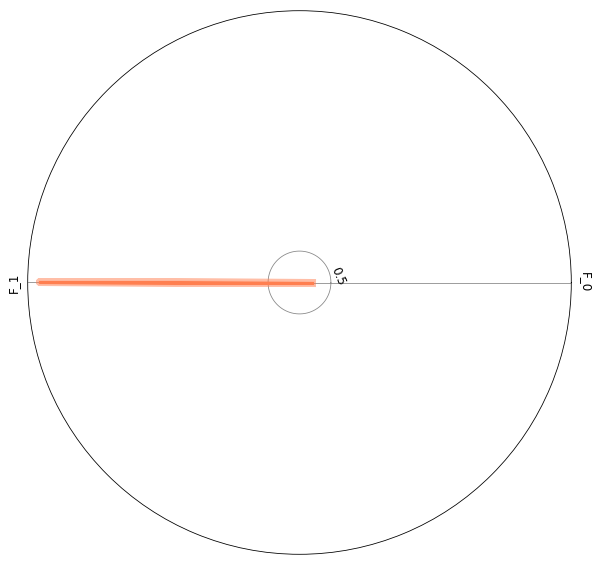

In [40]:
radar_plot(data = cores.to_numpy()[0], traits=CHOSEN_TRAITS)

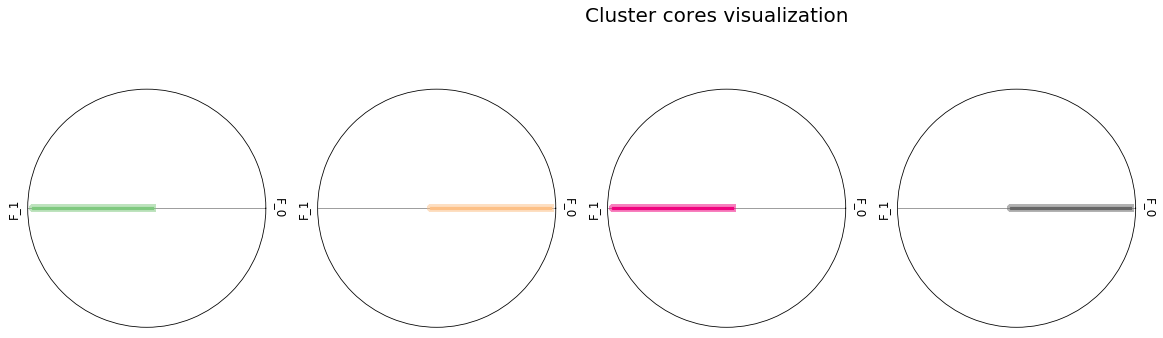

In [41]:
# Create a color palette:
my_palette = plt.cm.get_cmap("Accent", len(cores.index))

nb_clusters = len(cores)
fig = plt.figure(figsize=(20, 12))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(2, 5, i+1, polar=True)
    radar_plot(data = cores.to_numpy()[i], traits=CHOSEN_TRAITS, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()
        


In [42]:
raw_cores = df_raw.groupby('Class').mean()
raw_cores

,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Challenge,Closeness,Curiosity,Excitement,Harmony,...,Love,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence
Class,,,,,,,,,,,,,,,,,,,,,
0,0.702367,0.658936,0.341148,0.434337,0.543170,0.497799,0.330738,0.539252,0.265982,0.442851,...,0.289789,0.383383,0.371801,0.501433,0.618598,0.351843,0.442421,0.255160,0.412216,0.306874
1,0.458943,0.503063,0.307839,0.529752,0.670898,0.748282,0.701450,0.763677,0.728109,0.794035,...,0.658624,0.705758,0.783792,0.781891,0.686307,0.710119,0.737305,0.722120,0.802872,0.628595
2,0.845532,0.683311,0.446979,0.366530,0.412640,0.205897,0.174135,0.376633,0.120859,0.194311,...,0.142562,0.229427,0.211290,0.324211,0.476932,0.172033,0.301570,0.132218,0.181562,0.159248
3,0.590281,0.657711,0.341543,0.532194,0.599870,0.662817,0.522121,0.647178,0.437080,0.665326,...,0.460414,0.493596,0.551559,0.697424,0.688034,0.549672,0.565158,0.410188,0.582596,0.454089


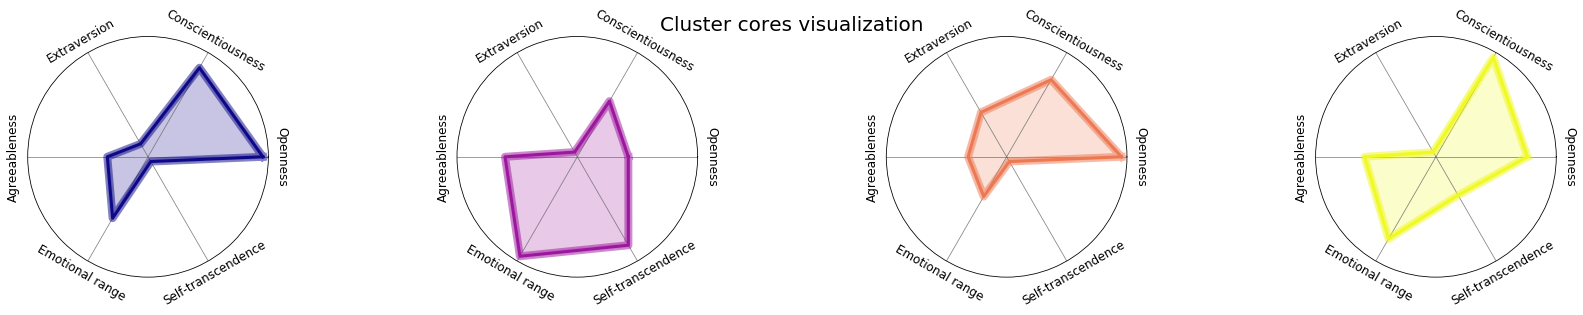

In [43]:
# Create a color palette:
my_palette = plt.cm.get_cmap("plasma", len(cores.index))

raw_cores = df_raw.groupby('Class').mean()

nb_clusters = len(cores)
fig = plt.figure(figsize=(24, 16))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(4, 4, i+1, polar=True)
    radar_plot(data = raw_cores[big5traits].to_numpy()[i], traits=big5traits, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()

### Silhouette evaluation

Silhouette quality of each cluster:
       Silhouette
Class            
0.0      0.598057
1.0      0.736757
2.0      0.720901
3.0      0.499019
Silhouette score of the clustering is:  0.6352066335870731


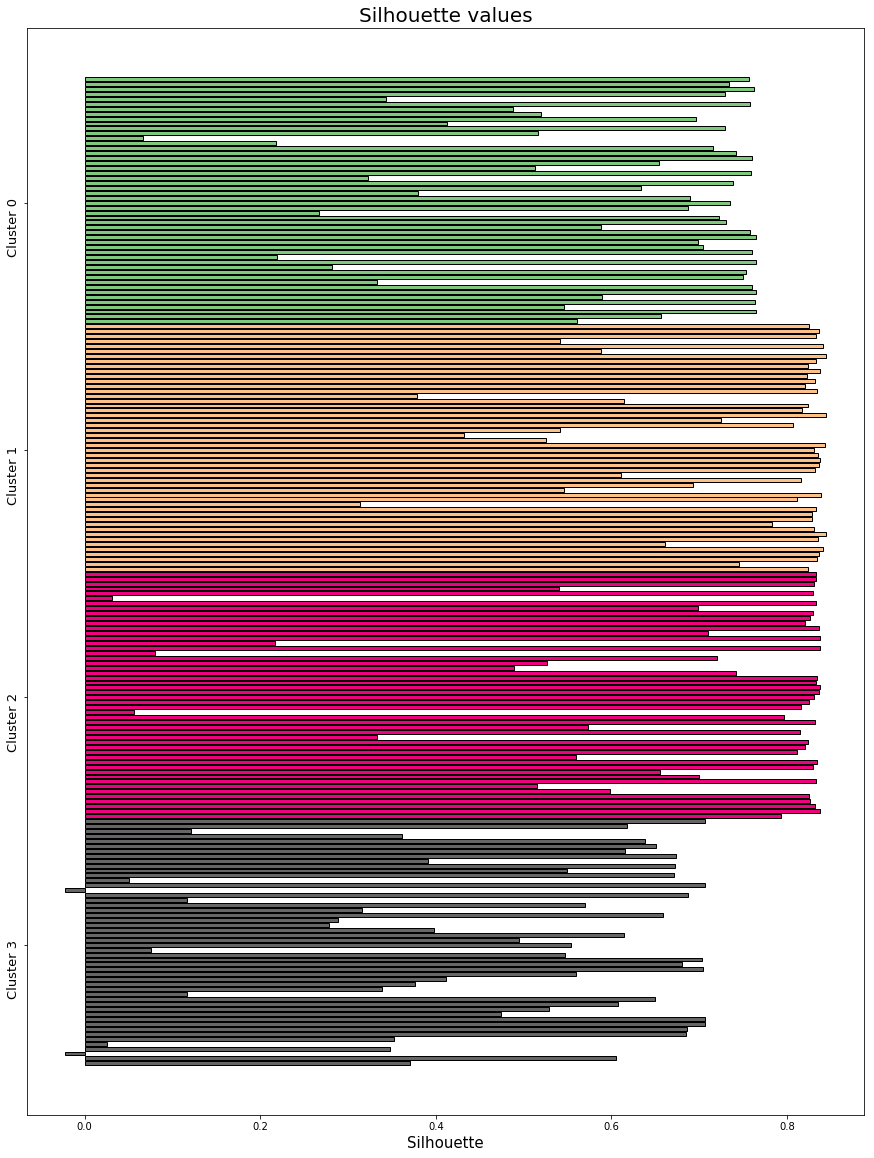

In [44]:
r = silhouette_evaluation(df, distance='l1', samples_per_class=50, cmap='Accent')

### Save results

In [46]:
df_raw.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Challenge,Closeness,Curiosity,Excitement,Harmony,...,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence,Class
0,0.672358,0.515518,0.202560,0.388493,0.952090,0.449133,0.491036,0.373575,0.361041,0.673358,...,0.527576,0.765530,0.314229,0.463151,0.362166,0.480516,0.437073,0.592248,0.485292,3
1,0.769577,0.442860,0.063138,0.152624,0.998766,0.792551,0.712586,0.726484,0.940915,0.769730,...,0.991403,0.998430,0.923608,0.908561,0.743416,0.608181,0.473193,0.882402,0.857386,1
2,0.445128,0.776801,0.899640,0.881138,0.706536,0.857511,0.842577,0.751038,0.759625,0.892253,...,0.529881,0.791273,0.899268,0.607543,0.917088,0.715703,0.825515,0.962015,0.753915,1
3,0.707812,0.725007,0.057476,0.296220,0.990815,0.551724,0.447475,0.519926,0.487398,0.721506,...,0.546406,0.840359,0.770971,0.740211,0.411759,0.566608,0.215377,0.478906,0.604419,3
4,0.659059,0.788241,0.708605,0.238162,0.566861,0.686579,0.331890,0.248036,0.528839,0.559211,...,0.619599,0.413212,0.747458,0.800460,0.741150,0.436434,0.685875,0.959131,0.235388,0


In [47]:
project.save_data('clustered_22d.csv', df_raw.to_csv(index=False), overwrite=True)
project.save_data('clustered_2d.csv', df.to_csv(index=False), overwrite=True)

{'file_name': 'clustered_2d.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'personalityinsightproject-donotdelete-pr-1pbhytm1hswznj',
 'asset_id': '50355740-56a6-4cc1-a1c1-438f9affaeb8'}

## Clustering NN

In [122]:
nb_clusters = 4
clustering_layer = Clustering(nb_clusters, name='clustering')(encoder.output)
model = Model(inputs=encoder.input, outputs=clustering_layer)

# Initialize cluster centers using k-means.
kmeans = KMeans(n_clusters=nb_clusters, random_state=0, algorithm='auto',
               max_iter=500, n_init=50).fit(data)

y_pred = kmeans.fit_predict(encoder.predict(X))
model.get_layer(name='clustering').set_weights([kmeans.cluster_centers_])

In [123]:
model.summary()

Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 22)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                230       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 55        
_________________________________________________________________
dropout_1 (Dropout)          (None, 5)                 0         
_________________________________________________________________
bottleneck (Dense)           (None, 2)                 12        
_________________________________________________________________
clustering (Clustering)      (None, 4)                 8   

### Approach 1

*As described in https://arxiv.org/pdf/1511.06335.pdf*

In [100]:
def eval_step(y_pred, profiles, iteration):
    
    # evaluate the clustering performance

    df = profiles.copy()
    df['Class'] = y_pred
    cluster_cores = df.groupby('Class').mean().to_numpy()

    dbi = Davies_Bouldin_index(df, 'Class', cluster_cores, Lk_norm)
    _, _, r1 = silhouette_evaluation(df, distance='l1', plot=False, verbose=False)
    print(">>> Iteration {:d}: Davies-Bouldin index is {:.4f}; Silhoutte value is {:.4f}.".format(iteration, dbi, r1))
    print("Loss is {:.4f}.".format(loss))
    print()
    
    res = pd.DataFrame([[iteration, dbi, r1]], columns=['Iteration', 'Davies-Bouldin Index', 'Silhouette'])
    return res

In [115]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.0003, 0.3), loss='kld')

In [102]:
# computing an auxiliary target distribution
def target_distribution(q):
    weight = q ** 2 / q.sum(axis=0)
    return (weight.T / weight.sum(axis=1)).T

In [103]:
q = model.predict(X, verbose=0)
q

array([[0.27413085, 0.22239073, 0.291481  , 0.2119974 ],
       [0.20558253, 0.36760804, 0.27998322, 0.14682616],
       [0.20650722, 0.36525452, 0.2808626 , 0.14737569],
       ...,
       [0.23831193, 0.29204154, 0.2985007 , 0.17114584],
       [0.21147573, 0.3528528 , 0.28517506, 0.15049635],
       [0.21866144, 0.335607  , 0.29029098, 0.15544063]], dtype=float32)

In [104]:
target_distribution(q)

array([[0.27382398, 0.22575548, 0.31636307, 0.18405747],
       [0.13379543, 0.5359055 , 0.2535961 , 0.07670303],
       [0.13547087, 0.530904  , 0.2560784 , 0.0775468 ],
       ...,
       [0.19746469, 0.3714809 , 0.3165908 , 0.11446358],
       [0.14461325, 0.5043401 , 0.26873225, 0.08231437],
       [0.15822719, 0.46692592, 0.28497937, 0.08986746]], dtype=float32)

In [105]:
# cl = model.get_layer('clustering')
# sess = tf.Session()
# with sess.as_default():
    
#     cluster_cores = cl.clusters.eval()
    
# cluster_cores

In [112]:
# we only want fine tuning withour influencing encoder part
model.trainable = False
model.layers[-1].trainable = True

In [116]:
# training parameters
loss = 1
index = 0
max_iter = 5000
update_interval = 25
index_array = np.arange(X.shape[0])
tol = 0.00001

batch_size = 256
y_pred_last = np.zeros(X.shape[0])

training_curves = pd.DataFrame(columns=['Iteration', 'Davies-Bouldin Index', 'Silhouette', 'KL Divergence'])
training_curves.head()

,Iteration,Davies-Bouldin Index,Silhouette,KL Divergence


In [117]:
for i in range(int(max_iter)):
    if i % update_interval == 0:
        q = model.predict(X, verbose=0)
        p = target_distribution(q)  # update the auxiliary target distribution p
        y_pred = q.argmax(1)
        res_step = eval_step(y_pred, profiles, i)
        res_step['KL Divergence'] = loss
        training_curves = training_curves.append(res_step)
        # check stop criterion - model convergence
        # delta_label = np.sum(y_pred != y_pred_last).astype(np.float32) / y_pred.shape[0]
        delta = np.linalg.norm(y_pred - y_pred_last)
        y_pred_last = np.copy(y_pred)
        
        if i > 0 and delta < tol:
            print('delta ', delta, '< tol ', tol)
            print('Reached tolerance threshold. Stopping training.')
            break
       
    # sequential
#     idx = index_array[index * batch_size: min((index+1) * batch_size, X.shape[0])]
#     loss = model.train_on_batch(x=X[idx], y=p[idx])
#     index = index + 1 if (index + 1) * batch_size <= X.shape[0] else 0
    
    # random
    start_from = np.random.randint(0, len(X))
    idx = index_array[start_from: min(start_from + batch_size, X.shape[0])]
    loss = model.train_on_batch(x=X[idx], y=p[idx])

>>> Iteration 0: Davies-Bouldin index is 0.4575; Silhoutte value is 0.6200.
Loss is 1.0000.

>>> Iteration 25: Davies-Bouldin index is 0.4575; Silhoutte value is 0.6199.
Loss is 0.0271.

>>> Iteration 50: Davies-Bouldin index is 0.4575; Silhoutte value is 0.6199.
Loss is 0.0196.

delta  0.0 < tol  1e-05
Reached tolerance threshold. Stopping training.


In [118]:
training_curves.head()

,Iteration,Davies-Bouldin Index,Silhouette,KL Divergence
0,0,0.457457,0.619962,1
0,25,0.457495,0.619948,0.027093
0,50,0.457495,0.619948,0.019635


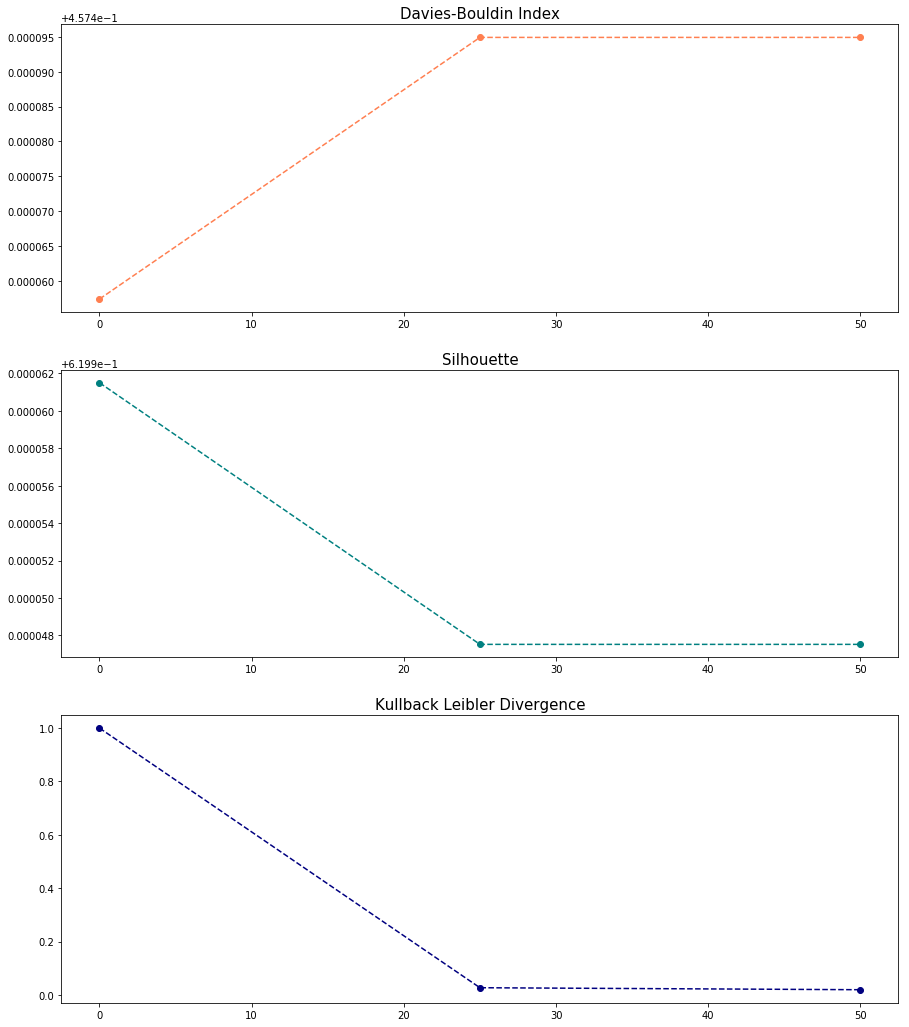

In [119]:
fig, axs = plt.subplots(3, 1, figsize=(15, 18))

axs[0].set_title('Davies-Bouldin Index', fontsize=15)
axs[0].plot(training_curves['Iteration'], training_curves['Davies-Bouldin Index'], '--o', color='coral')
axs[1].set_title('Silhouette', fontsize=15)
axs[1].plot(training_curves['Iteration'], training_curves['Silhouette'], '--o', color='teal')
axs[2].set_title('Kullback Leibler Divergence', fontsize=15)
axs[2].plot(training_curves['Iteration'], training_curves['KL Divergence'], '--o', color='navy');


### Aproach 2

*Custom training with Silhouette loss*

In [257]:
print(tf.__version__)

2.0.0


In [126]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.88), loss='kld')

In [127]:
X = np.array(X).astype('float32')
X

array([[0.672, 0.516, 0.203, ..., 0.437, 0.592, 0.485],
       [0.77 , 0.443, 0.063, ..., 0.473, 0.882, 0.857],
       [0.445, 0.777, 0.9  , ..., 0.826, 0.962, 0.754],
       ...,
       [0.542, 0.319, 0.17 , ..., 0.561, 0.372, 0.836],
       [0.643, 0.743, 0.12 , ..., 0.477, 0.687, 0.86 ],
       [0.585, 0.481, 0.468, ..., 0.66 , 0.876, 0.638]], dtype=float32)

In [258]:
Xtf = tf.convert_to_tensor(X)
Xtf

<tf.Tensor: id=19434723, shape=(5437, 22), dtype=float32, numpy=
array([[0.672, 0.516, 0.203, ..., 0.437, 0.592, 0.485],
       [0.77 , 0.443, 0.063, ..., 0.473, 0.882, 0.857],
       [0.445, 0.777, 0.9  , ..., 0.826, 0.962, 0.754],
       ...,
       [0.542, 0.319, 0.17 , ..., 0.561, 0.372, 0.836],
       [0.643, 0.743, 0.12 , ..., 0.477, 0.687, 0.86 ],
       [0.585, 0.481, 0.468, ..., 0.66 , 0.876, 0.638]], dtype=float32)>

In [168]:
def Silhouette_from_scratch(X, labels, distance):

    X = X[:, :-1]
    
    # computing sizes of C_i
    cluster_codes, cluster_lengths = np.unique(labels, return_counts=True)
    cluster_sizes = {c:cluster_lengths[i] for i, c in enumerate(cluster_codes)}
    
    # creating a resulting array
    sil = np.zeros_like(labels)
    subsets = {c:X[labels == c] for c in cluster_codes}
    
    if distance == 'l2':
        # mean distance to kindred
        ai = np.array([np.sum([np.linalg.norm(X[i] - kindred) for kindred in subsets[labels[i]]])/(cluster_sizes[labels[i]]-1) for i in range(len(X))])
        
        # smallest distance to other clusters
        bi = np.array([np.min([np.sum([np.linalg.norm(X[i] - other) for other in subsets[K]])/cluster_sizes[K] for K in cluster_codes if K != labels[i]]) for i in range(len(X))])
        
        # silhouette coefficient
        sil = (bi - ai)/np.max([ai, bi], axis=0)
        
    
    return sil

In [171]:
y_np = model.predict(Xtf).argmax(1)
np.unique(y_np, return_counts=True)

(array([0, 1, 2, 3]), array([2108, 1045, 1168, 1116]))

In [177]:
norm_order = 1
distances = np.zeros(shape=(len(X), len(X)))

for i in range(len(X)):
    for j in range(len(X)):
        distances[i, j] = np.linalg.norm(X[i] - X[j], ord=norm_order)

In [182]:
tf_distances = tf.convert_to_tensor(distances, dtype='float32')

In [190]:
start_time = time.time()
# inside Silhouette func
norm_order = 1
y_pred = model(Xtf)
q = tf.argmax(y_pred, axis=1)
classes, idx = tf.unique(q)
classes = tf.sort(classes)

ai = tf.Variable(np.zeros(len(q)), dtype='float32')
bi = tf.Variable(np.zeros(len(q)), dtype='float32')

# for k, pred in enumerate(q):
#     for i, other in enumerate(q):
        
#         # kindred
#         if pred == other:
#             ai[pred].assign(ai[pred] + tf_distances[k, i])
            
#         else:
#             bi[pred].assign(bi[pred] + tf_distances[k, i])
            
total_time = time.time() - start_time
print("Took {:.2f} seconds.".format(total_time))

Took 0.02 seconds.


In [260]:
def loss(model, x, y, training):
    # training=training is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    y_ = model(x, training=training)
    labels = tf.argmax(y_, axis=1)
    loss_value = tf.py_function(func=Silhouette_loss, inp=[x, labels.numpy()], Tout=tf.float32)
    return loss_value

def customLoss(yTrue, yPred):
    y = tf.argmax(yPred, axis=1)
    return silhouette_score(X, y, metric='l1')
    
def Silhouette_loss(x, y): 
    sil_score = silhouette_score(x, y, metric='l1')
    return tf.convert_to_tensor(1 - sil_score, dtype='float32')

In [261]:
loss(model, Xtf, np.zeros(len(Xtf)), True)

<tf.Tensor: id=19434793, shape=(), dtype=float32, numpy=0.91504556>

In [235]:
def grad(model, inputs, targets):
    with tf.GradientTape() as tape:
        tape.watch(inputs)
        loss_value = loss(model, inputs, targets, training=True)
        tape.watch(model.trainable_variables)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [227]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.95)

In [228]:
loss_value, grads = grad(model, Xtf, tf.ones(len(Xtf), dtype='int64'))

In [229]:
grads

[None, None, None, None, None, None, None]

In [71]:
features = tf.convert_to_tensor(X)
loss_value, grads = grad(model, features, df)

print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                          loss_value))

optimizer.apply_gradients(zip(grads, model.trainable_variables))

print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          Silhouette_loss(model, features, df, training=True)))

Step: 0, Initial Loss: 1.0129209873965956


ValueError: No gradients provided for any variable: ['dense/kernel:0', 'dense/bias:0', 'dense_1/kernel:0', 'dense_1/bias:0', 'bottleneck/kernel:0', 'bottleneck/bias:0', 'clustering/clusters:0'].

### Evaluation

In [147]:
q = model.predict(X, verbose=0)

# evaluate the clustering performance
y_pred = q.argmax(1)
df = profiles.copy()
df_raw = profiles_raw.copy()
df['Class'] = y_pred
df_raw['Class'] = y_pred
cluster_cores = df.groupby('Class').mean().to_numpy()
cluster_cores_raw = df_raw.groupby('Class').mean().to_numpy()

/opt/conda/envs/Python36/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


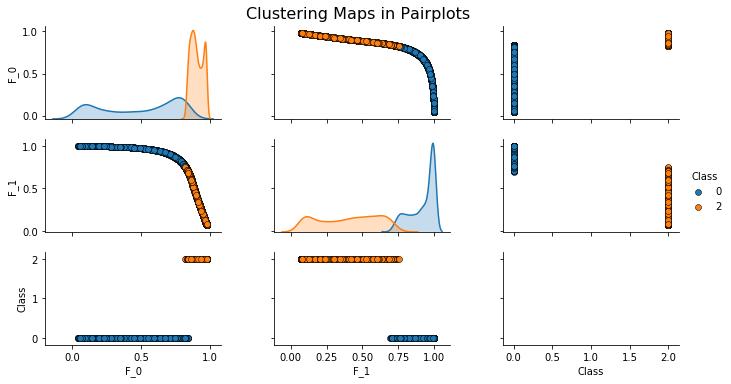

In [146]:
pp = sns.pairplot(df, size=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

IndexError: index 2 is out of bounds for axis 0 with size 2

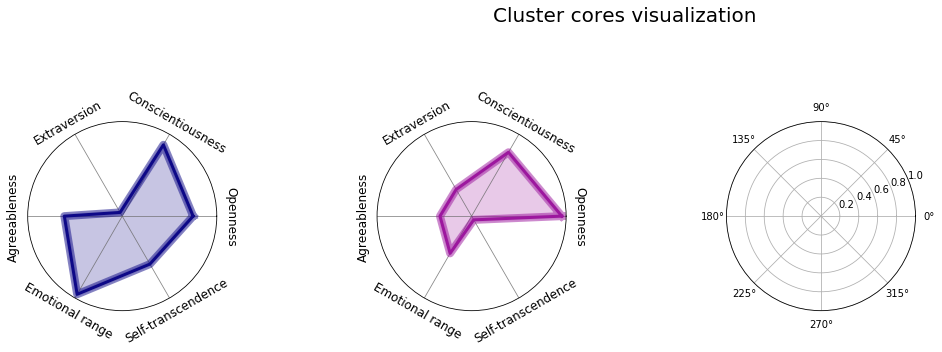

In [154]:
# Create a color palette:
my_palette = plt.cm.get_cmap("plasma", len(cores.index))

raw_cores = df_raw.groupby('Class').mean()

nb_clusters = len(cores)
fig = plt.figure(figsize=(24, 16))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(4, 4, i+1, polar=True)
    radar_plot(data = raw_cores[big5traits].to_numpy()[i], traits=big5traits, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()

In [161]:
Davies_Bouldin_index(df, 'Class', cluster_cores, Lk_norm)

nan

Silhouette quality of each cluster:
       Silhouette
Class            
0.0      0.476552
2.0      0.671935
Silhouette score of the clustering is:  0.5759863682376813


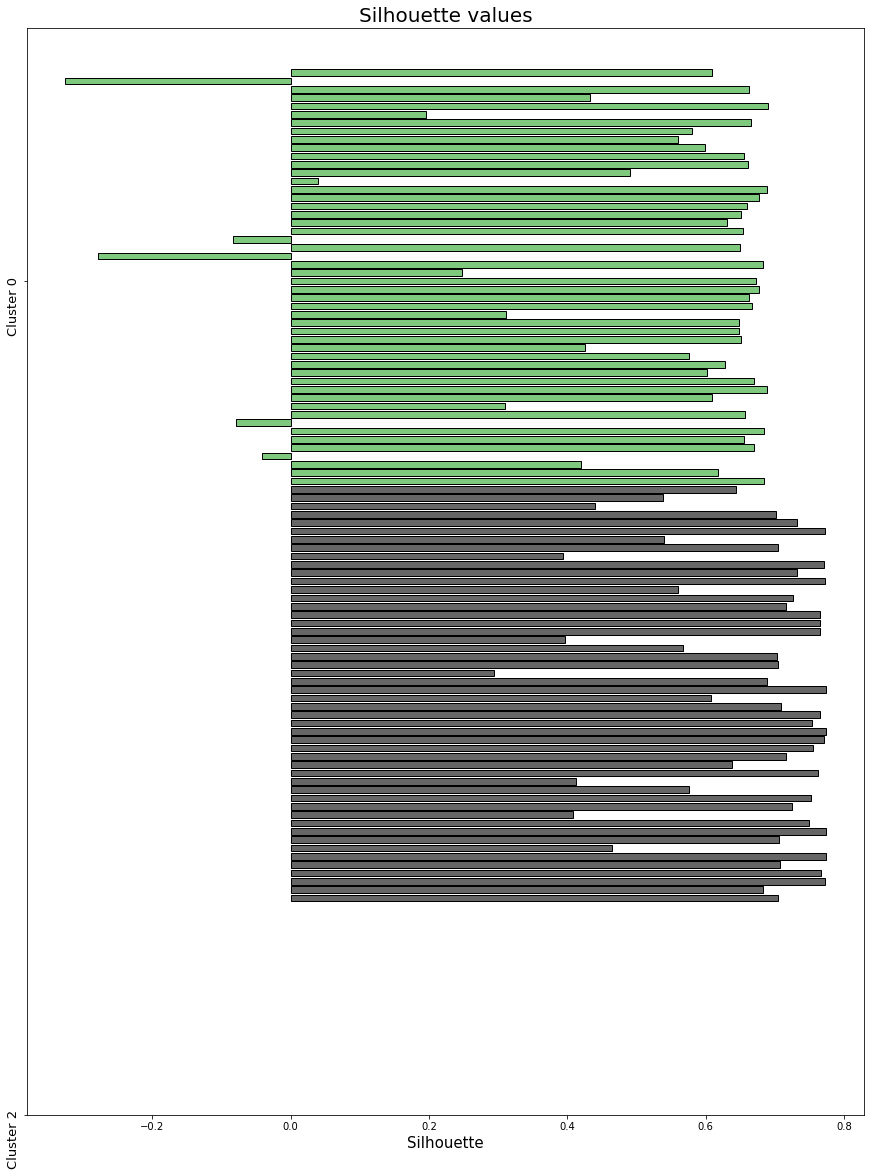

In [153]:
r = silhouette_evaluation(df, distance='l1', samples_per_class=50, cmap='Accent')

## Gaussian Mixtures

*A Gaussian mixture model is a probabilistic model that assumes all the data points are generated from a mixture of a finite number of Gaussian distributions with unknown parameters. One can think of mixture models as generalizing k-means clustering to incorporate information about the covariance structure of the data as well as the centers of the latent Gaussians.*

In [128]:
from sklearn.mixture import GaussianMixture

In [129]:
data = profiles.to_numpy()
N = data.shape[0]
data.shape

(5437, 2)

### Model

In [130]:
start_time = time.time()
nb_comps = 4

gm = GaussianMixture(n_components=nb_comps, init_params='kmeans', covariance_type='tied',
                    max_iter=1000, n_init=10).fit(data)

print("Took {:.2f} seconds.".format(time.time() - start_time))

Took 0.60 seconds.


In [131]:
dist_covs = gm.covariances_
print(dist_covs.shape)

(2, 2)


In [132]:
df_dists = pd.DataFrame()
df_mah = pd.DataFrame()

dist_means = gm.means_
print(dist_means.shape)
dist_covs = gm.covariances_
print(dist_means.shape)

# covariance = full
if len(dist_covs.shape) == 3:
    inv_covs = np.array([np.linalg.inv(cov) for cov in dist_covs])

    for i in range(nb_comps):
        df_dists['DD_{:d}'.format(i)] = profiles.apply(lambda x: Distribution_distance(x, dist_means[i], dist_covs[i]), axis=1)
        df_mah['MD_{:d}'.format(i)] = profiles.apply(lambda x: Mahalanobis_distance(x, dist_means[i], inv_covs[i]), axis=1)
        
# covariance = tied
if len(dist_covs.shape) == 2:
    inv_covs = np.linalg.inv(dist_covs)

    for i in range(nb_comps):
        df_dists['DD_{:d}'.format(i)] = profiles.apply(lambda x: Distribution_distance(x, dist_means[i], dist_covs), axis=1)
        df_mah['MD_{:d}'.format(i)] = profiles.apply(lambda x: Mahalanobis_distance(x, dist_means[i], inv_covs), axis=1)

df_dists.head()

(4, 2)
(4, 2)


,DD_0,DD_1,DD_2,DD_3
0,52.469442,44.381570,37.293398,26.566723
1,45.159358,26.494334,67.114538,34.772894
2,70.348601,21.537066,71.298999,34.924990
3,68.660649,48.566623,53.354934,38.568550
4,47.629174,91.601584,74.776700,80.044310


In [133]:
df_mah.head()

,MD_0,MD_1,MD_2,MD_3
0,1.415768,36.728593,15.264169,4.896397
1,47.508059,0.155904,97.416892,14.502855
2,50.565077,0.109890,101.010553,15.857258
3,4.683791,25.681112,24.391235,1.688753
4,0.491879,50.893590,9.535997,11.357008


In [134]:
df_dists = df_dists.apply(lambda x: minmax_scaling(1/x), axis=1)
df_dists['Prediction'] = df_dists.apply(lambda x: np.argmax(x.to_numpy()), axis = 1)
df_dists.head(10)

,DD_0,DD_1,DD_2,DD_3,Prediction
0,0.000000,0.186906,0.417368,1.000000,3
1,0.317103,1.000000,0.000000,0.606642,1
2,0.005847,1.000000,0.000000,0.450759,1
3,0.000000,0.530286,0.367671,1.000000,3
4,1.000000,0.000000,0.243713,0.156393,0
5,0.000000,0.175789,0.193591,1.000000,3
6,0.105082,0.000000,0.121243,1.000000,3
7,0.000000,1.000000,0.060298,0.628167,1
8,1.000000,0.000000,0.019804,0.232785,0
9,0.007434,0.536141,0.000000,1.000000,3


In [135]:
df_mah = df_mah.apply(lambda x: minmax_scaling(1/x), axis=1)
df_mah['Prediction'] = df_mah.apply(lambda x: np.argmax(x.to_numpy()), axis = 1)
df_mah.head(10)

,MD_0,MD_1,MD_2,MD_3,Prediction
0,1.000000,0.000000,0.056377,0.260645,0
1,0.001684,1.000000,0.000000,0.009164,1
2,0.001087,1.000000,0.000000,0.005848,1
3,0.315544,0.000000,0.003722,1.000000,3
4,1.000000,0.000000,0.042325,0.033974,0
5,0.691287,0.000000,0.028823,1.000000,3
6,1.000000,0.000000,0.045751,0.708595,0
7,0.013147,1.000000,0.000000,0.059477,1
8,0.132258,0.008301,0.000000,1.000000,3
9,0.050195,0.173089,0.000000,1.000000,3


In [136]:
np.unique(df_dists['Prediction'].to_numpy(), return_counts=True)

(array([0, 1, 2, 3]), array([2032,  490, 1972,  943]))

In [137]:
np.unique(df_mah['Prediction'].to_numpy(), return_counts=True)

(array([0, 1, 2, 3]), array([1223,  556, 2748,  910]))

In [149]:
df = profiles.copy()
df_raw = profiles_raw.copy()
df['Class'] = df_mah['Prediction']
df_raw['Class'] = df_mah['Prediction']

df.head()

,F_0,F_1,Class
0,0.646215,0.006775,0
1,1.400949,0.016421,1
2,1.376467,0.006096,1
3,0.751981,0.003400,3
4,0.623382,0.028272,0


In [139]:
cores = pd.DataFrame(dist_means, columns=profiles.columns)
cores

,F_0,F_1
0,0.587063,0.018038
1,1.384639,0.010726
2,0.210416,0.012942
3,0.927380,0.011433


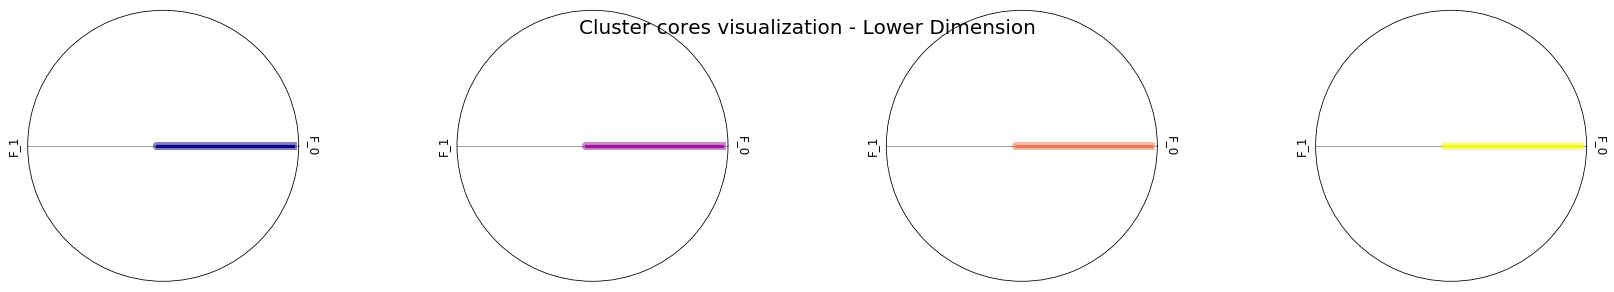

In [140]:
# Create a color palette:
my_palette = plt.cm.get_cmap("plasma", len(cores.index))

nb_clusters = len(cores)
fig = plt.figure(figsize=(24, 16))
fig.suptitle('Cluster cores visualization - Lower Dimension', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(nb_clusters, nb_clusters, i+1, polar=True)
    radar_plot(data = cores.to_numpy()[i], traits=df.columns[:-1], 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()

In [150]:
raw_cores = df_raw.groupby('Class').mean()
raw_cores

,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Challenge,Closeness,Curiosity,Excitement,Harmony,Ideal,Liberty,Love,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence
Class,,,,,,,,,,,,,,,,,,,,,,
0.0,0.668504,0.631504,0.356846,0.460524,0.547215,0.527602,0.411540,0.580282,0.352764,0.502722,0.470687,0.395091,0.364577,0.431477,0.449955,0.551565,0.619431,0.409924,0.500711,0.341282,0.472519,0.374776
1.0,0.627075,0.601408,0.339242,0.454982,0.598413,0.544022,0.459831,0.587534,0.432134,0.548180,0.537787,0.457041,0.422077,0.485131,0.523001,0.568401,0.602487,0.467931,0.537733,0.431431,0.538442,0.420684
2.0,0.685313,0.649784,0.369977,0.450922,0.521623,0.480915,0.373077,0.544719,0.321301,0.465957,0.429684,0.346848,0.330555,0.406494,0.412417,0.537180,0.612698,0.396846,0.464190,0.313862,0.428234,0.331943
3.0,0.654021,0.622408,0.341517,0.443306,0.584500,0.523647,0.403302,0.564770,0.370715,0.499717,0.492410,0.398464,0.364509,0.443389,0.466583,0.553946,0.597686,0.420171,0.493963,0.358045,0.493045,0.368328


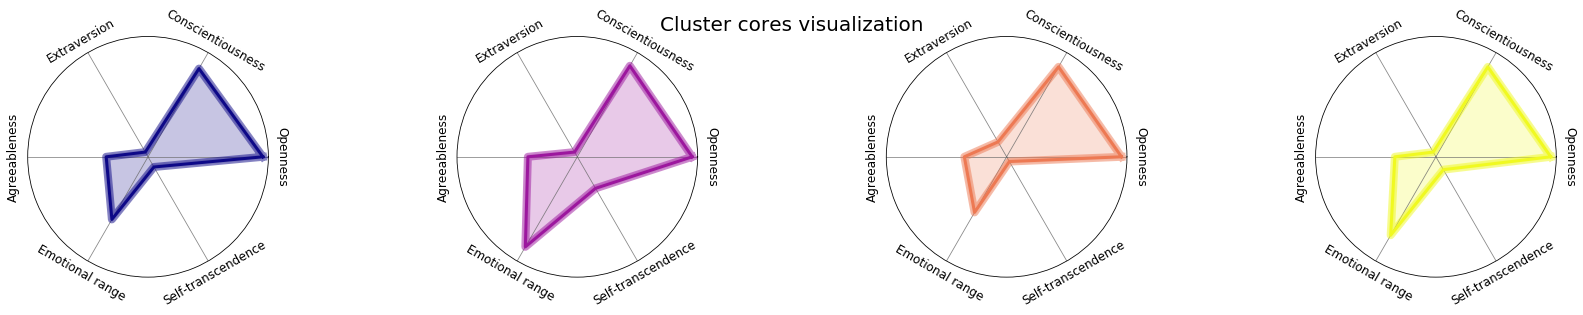

In [155]:
# Create a color palette:
my_palette = plt.cm.get_cmap("plasma", len(cores.index))

raw_cores = df_raw.groupby('Class').mean()

nb_clusters = len(cores)
fig = plt.figure(figsize=(24, 16))
fig.suptitle('Cluster cores visualization', fontsize=20)

for i in range(nb_clusters):
    axs = plt.subplot(4, 4, i+1, polar=True)
    radar_plot(data = raw_cores[big5traits].to_numpy()[i], traits=big5traits, 
               COLOR=my_palette(i), ax=axs, drop_yticks=True, drop_xticks=False)
    
plt.tight_layout()

### Visualization

/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/conda/envs/Python36/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/opt/conda/envs/Python36/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


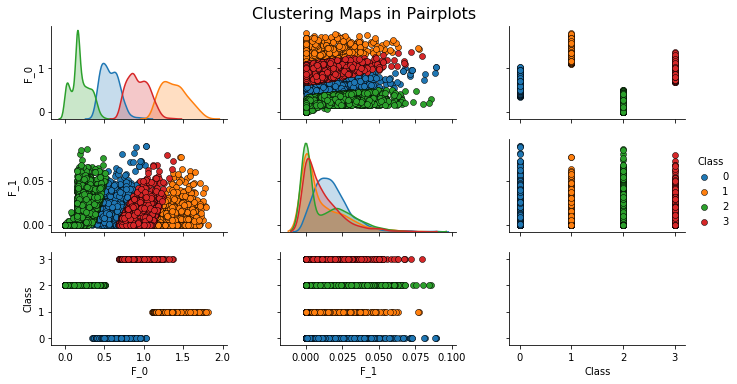

In [152]:
pp = sns.pairplot(df, height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

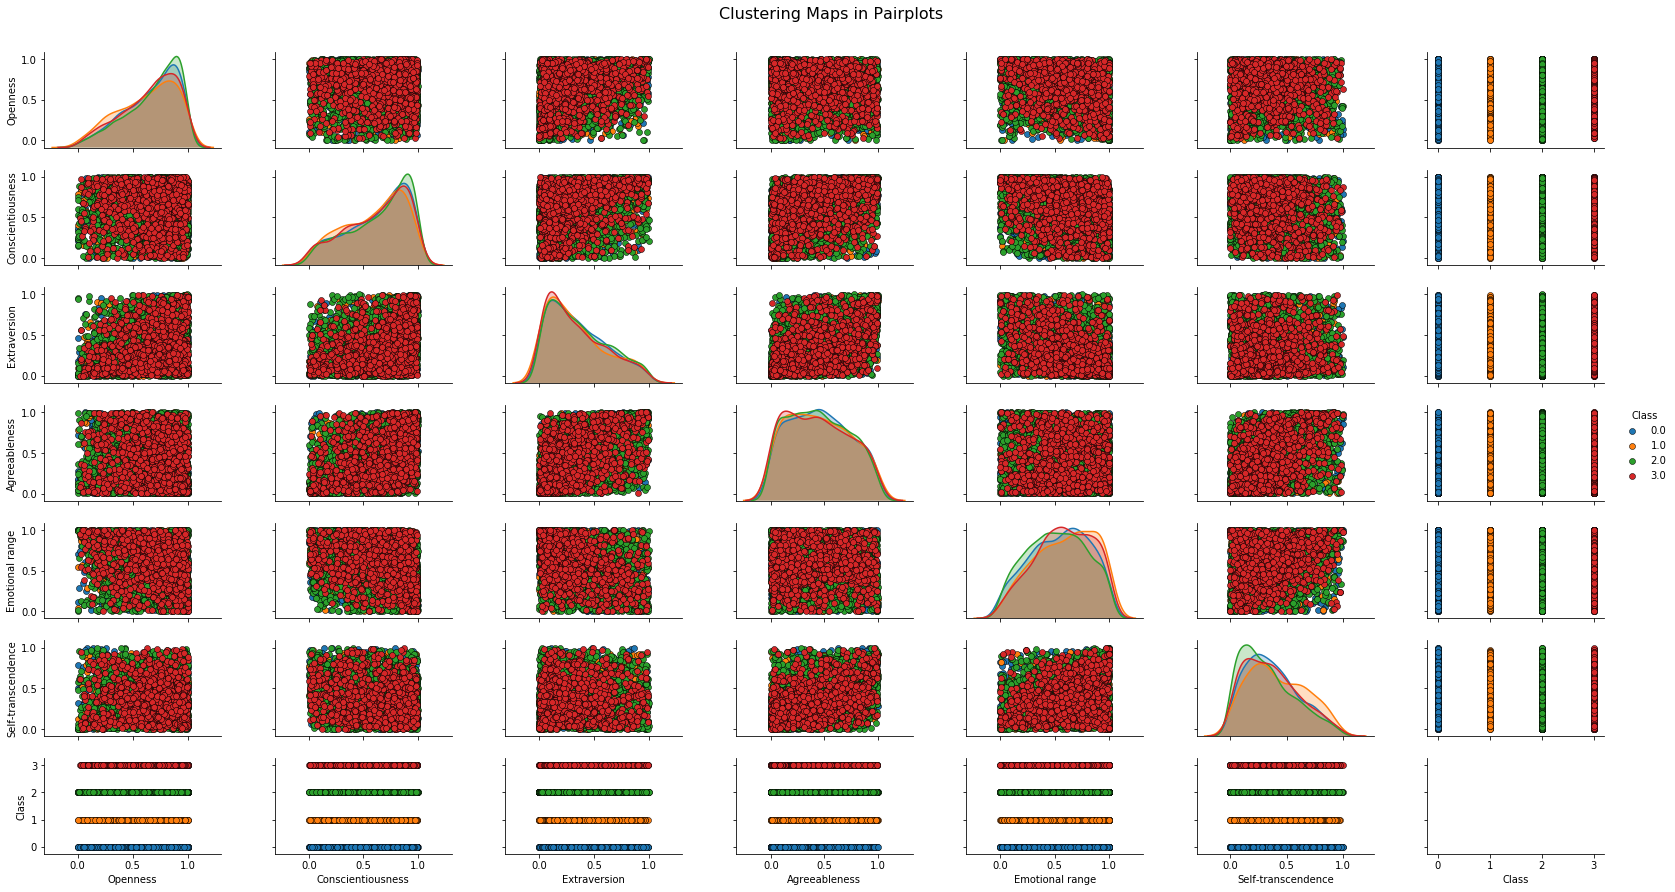

In [156]:
big5traits.append('Class')
pp = sns.pairplot(df_raw[big5traits], height=1.8, aspect=1.8,
                  plot_kws=dict(edgecolor="k", linewidth=0.5),
                  diag_kind="kde", diag_kws=dict(shade=True), 
                 hue='Class')

fig = pp.fig 

fig.subplots_adjust(top=0.93, wspace=0.3)
t = fig.suptitle('Clustering Maps in Pairplots', fontsize=16)

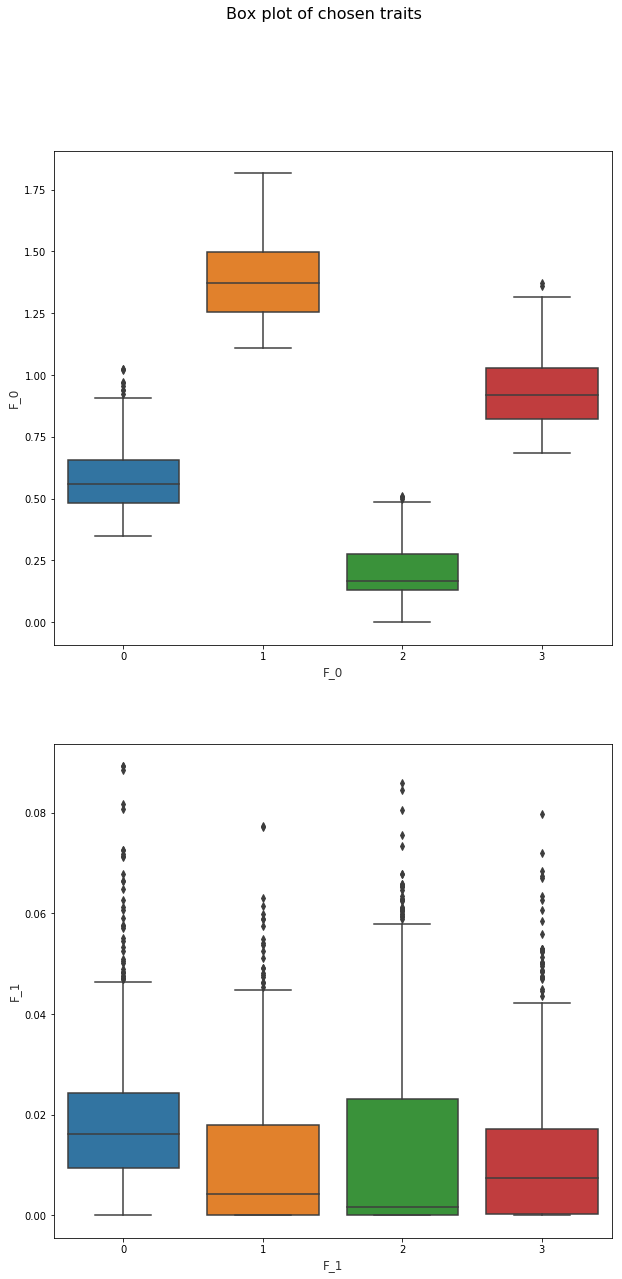

In [157]:
fig, axs = plt.subplots(len(df.columns[:-1]), 1, figsize=(10, 20))
fig.suptitle('Box plot of chosen traits', fontsize=16)

for i, trait in enumerate(df.columns[:-1]):
    boxplot(trait, 'Class', df, axs[i])

### Evaluation

In [158]:
Davies_Bouldin_index(df, 'Class', dist_means, Lk_norm)

0.608027366052283

In [159]:
Davies_Bouldin_Mahalanobis(df, 'Class', dist_means, inv_covs)

0.34202033954961614

Silhouette quality of each cluster:
       Silhouette
Class            
0.0      0.246672
1.0      0.264137
2.0      0.206827
3.0      0.239749
Silhouette score of the clustering is:  0.22716080190056073


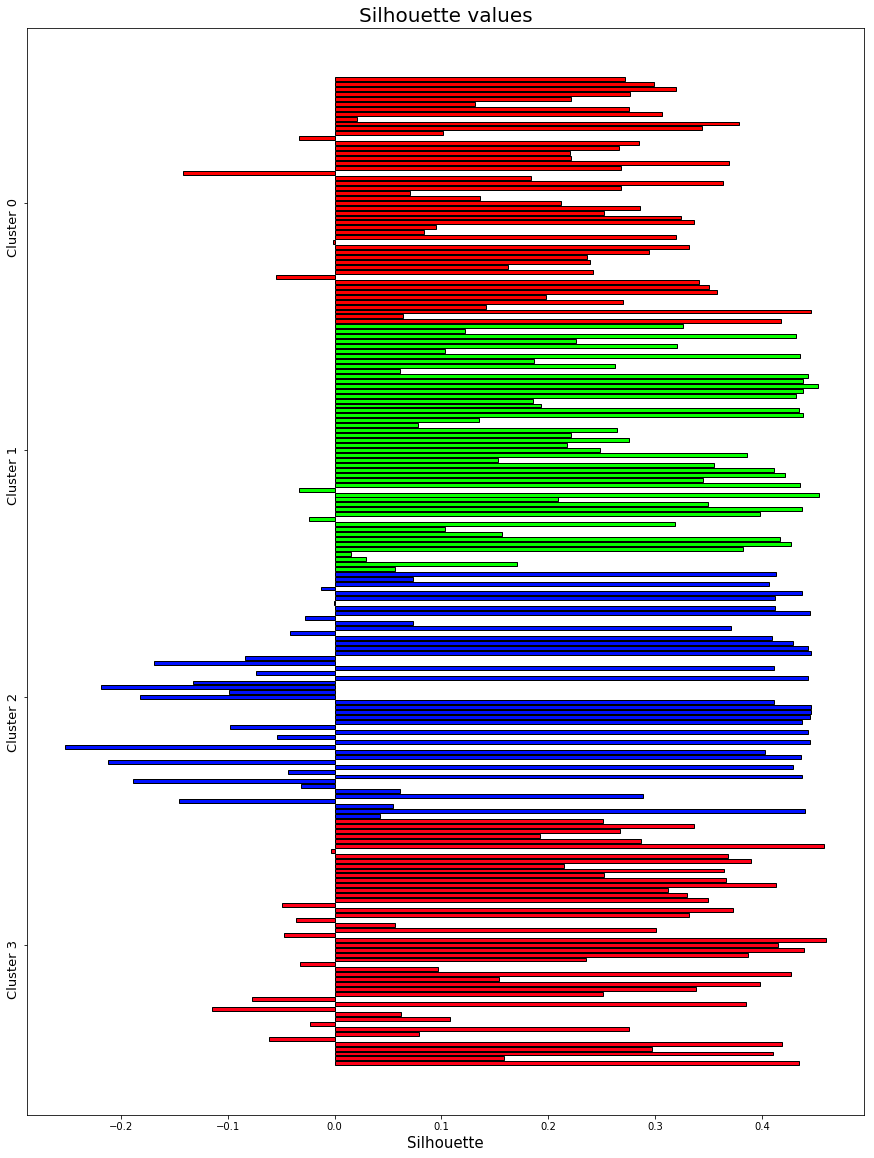

In [160]:
sil_df = silhouette_evaluation(df, distance='mahalanobis')

## Grid Search 
*Kmeans & GM over various new dimensions, obtained with Autoencoder*

### One iteration over grid functions

In [55]:
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans

In [56]:
def Kmeans_full(nb_comps, data, profiles):
    
    dim = data.shape[1]
    
    # algorithm
    kmeans = KMeans(n_clusters=nb_comps, random_state=0, algorithm='auto',
               max_iter=1000, n_init=50).fit(data)
    
    # concatenating labels
    cat = kmeans.labels_
    df = profiles.copy()
    df['Class'] = cat
    cluster_cores = kmeans.cluster_centers_
    
    # evaluation
    db_ind = Davies_Bouldin_index(df, 'Class', cluster_cores, Lk_norm)
    _, _, sil_l1 = silhouette_evaluation(df, distance='l1', samples_per_class=100, plot=False, verbose=False)
    _, _, sil_mah = silhouette_evaluation(df, distance='mahalanobis', samples_per_class=100, plot=False, verbose=False)
    
    return pd.DataFrame([[dim, 'Kmeans', nb_comps, db_ind, None, sil_l1, sil_mah]],
                        columns=['Dimension', 'Algorithm', 'Components', 'Davies-Bouldin-L1', 'Davies-Bouldin-Mahalanobis', 'Silhouette-L1', 'Silhouette-Mahalanobis'])

In [57]:
def GM_full(nb_comps, data, profiles, cov_type='tied'):
    
    dim = data.shape[1]
    
    # algorithm
    gm = GaussianMixture(n_components=nb_comps, init_params='kmeans', covariance_type=cov_type,
                    max_iter=1000, n_init=10).fit(data)
    
    
    # concatenating labels
    df_dists = pd.DataFrame()
    df_mah = pd.DataFrame()

    dist_means = gm.means_
    dist_covs = gm.covariances_

    # covariance = full
    if len(dist_covs.shape) == 3:
        inv_covs = np.array([np.linalg.inv(cov) for cov in dist_covs])

        for i in range(nb_comps):
            df_mah['MD_{:d}'.format(i)] = profiles.apply(lambda x: Mahalanobis_distance(x, dist_means[i], inv_covs[i]), axis=1)

    # covariance = tied
    if len(dist_covs.shape) == 2:
        inv_covs = np.linalg.inv(dist_covs)

        for i in range(nb_comps):
            df_mah['MD_{:d}'.format(i)] = profiles.apply(lambda x: Mahalanobis_distance(x, dist_means[i], inv_covs), axis=1)
    
    df_mah = df_mah.apply(lambda x: minmax_scaling(1/x), axis=1)
    df_mah['Prediction'] = df_mah.apply(lambda x: np.argmax(x.to_numpy()), axis = 1)
    df = profiles.copy()
    df['Class'] = df_mah['Prediction']
    
    
    # evaluation
    db_ind = Davies_Bouldin_index(df, 'Class', dist_means, Lk_norm)
    db_mah = Davies_Bouldin_Mahalanobis(df, 'Class', dist_means, inv_covs)
    _, _, sil_l1 = silhouette_evaluation(df, distance='l1', samples_per_class=100, plot=False, verbose=False)
    _, _, sil_mah = silhouette_evaluation(df, distance='mahalanobis', samples_per_class=100, plot=False, verbose=False)
    
    return pd.DataFrame([[dim, 'GM', nb_comps, db_ind, db_mah, sil_l1, sil_mah]],
                        columns=['Dimension', 'Algorithm', 'Components', 'Davies-Bouldin-L1', 'Davies-Bouldin-Mahalanobis', 'Silhouette-L1', 'Silhouette-Mahalanobis'])

In [58]:
def FA_full(data_raw, new_dimension):
    
    # initializing factor analysis
    fa = FactorAnalysis(n_components=new_dimension, svd_method='lapack', tol=0.001)
    
    # changing dimension
    X_new = fa.fit_transform(data_raw)
    
    return X_new
    

### Initialization & Loop

In [59]:
# loading profiles.csv
f = project.get_file('profiles.csv')
profiles_raw = pd.read_csv(f)
profiles_raw.drop(columns=['UID'], inplace=True)
profiles_raw.dropna(axis=0, inplace=True)
profiles_raw.head()

,Openness,Conscientiousness,Extraversion,Agreeableness,Emotional range,Challenge,Closeness,Curiosity,Excitement,Harmony,...,Love,Practicality,Self-expression,Stability,Structure,Conservation,Openness to change,Hedonism,Self-enhancement,Self-transcendence
0,0.672358,0.515518,0.202560,0.388493,0.952090,0.449133,0.491036,0.373575,0.361041,0.673358,...,0.669498,0.527576,0.765530,0.314229,0.463151,0.362166,0.480516,0.437073,0.592248,0.485292
1,0.769577,0.442860,0.063138,0.152624,0.998766,0.792551,0.712586,0.726484,0.940915,0.769730,...,0.964348,0.991403,0.998430,0.923608,0.908561,0.743416,0.608181,0.473193,0.882402,0.857386
2,0.445128,0.776801,0.899640,0.881138,0.706536,0.857511,0.842577,0.751038,0.759625,0.892253,...,0.899586,0.529881,0.791273,0.899268,0.607543,0.917088,0.715703,0.825515,0.962015,0.753915
3,0.707812,0.725007,0.057476,0.296220,0.990815,0.551724,0.447475,0.519926,0.487398,0.721506,...,0.542529,0.546406,0.840359,0.770971,0.740211,0.411759,0.566608,0.215377,0.478906,0.604419
4,0.659059,0.788241,0.708605,0.238162,0.566861,0.686579,0.331890,0.248036,0.528839,0.559211,...,0.247863,0.619599,0.413212,0.747458,0.800460,0.741150,0.436434,0.685875,0.959131,0.235388


In [60]:
# parameter grid
partitions = [4, 5, 8, 10]
new_dimensions = [2, 3, 4, 5, 6, 7, 8]
print("Grid search on {:d}x{:d} grid.".format(len(partitions), len(new_dimensions)))

Grid search on 4x7 grid.


In [61]:
# results dataframe
scores = pd.DataFrame(columns=['Dimension', 'Algorithm', 'Components', 'Davies-Bouldin-L1', 'Davies-Bouldin-Mahalanobis', 'Silhouette-L1', 'Silhouette-Mahalanobis'])
scores

,Dimension,Algorithm,Components,Davies-Bouldin-L1,Davies-Bouldin-Mahalanobis,Silhouette-L1,Silhouette-Mahalanobis


In [62]:
X = profiles_raw.to_numpy()
X = np.round(X, 3)
start_time = time.time()
for new_dim in new_dimensions:
    print(">>>>><<<<<")
    # encoder training and dimensionality reduction
    autoencoder = Auto_Encoder((22, ), new_dim, activation='sigmoid',summary=False)
    autoencoder.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001), loss=tf.keras.losses.MSE)
    autoencoder.fit(X, X,
        epochs=100,
        batch_size=128,
        shuffle=True,
        validation_split=0.2)

    encoder = Model(autoencoder.input, autoencoder.get_layer('bottleneck').output)
    data = encoder.predict(X)
    profiles = pd.DataFrame(data)       
    print("Autoencoder is trained.")
    
    for nb_comps in partitions:
        
        print("Dimension is {:d}; looking for {:d} clusters.".format(new_dim, nb_comps))               
        # clustering
        kmeans_row = Kmeans_full(nb_comps, data, profiles)
        gm_row = GM_full(nb_comps, data, profiles)
        print("Clustering is done.")
        scores = scores.append(kmeans_row)
        scores = scores.append(gm_row)
        print("<<<<<>>>>>")
        print()

total_time = time.time() - start_time
print("Grid search is over.")

>>>>><<<<<
Train on 4349 samples, validate on 1088 samples
Epoch 1/100
4349/4349 [==============================] - 1s 191us/sample - loss: 0.0832 - val_loss: 0.0815
Epoch 2/100
4349/4349 [==============================] - 0s 38us/sample - loss: 0.0774 - val_loss: 0.0789
Epoch 3/100
4349/4349 [==============================] - 0s 36us/sample - loss: 0.0746 - val_loss: 0.0780
Epoch 4/100
4349/4349 [==============================] - 0s 37us/sample - loss: 0.0732 - val_loss: 0.0776
Epoch 5/100
4349/4349 [==============================] - 0s 35us/sample - loss: 0.0725 - val_loss: 0.0775
Epoch 6/100
4349/4349 [==============================] - 0s 36us/sample - loss: 0.0721 - val_loss: 0.0776
Epoch 7/100
4349/4349 [==============================] - 0s 34us/sample - loss: 0.0721 - val_loss: 0.0777
Epoch 8/100
4349/4349 [==============================] - 0s 37us/sample - loss: 0.0721 - val_loss: 0.0776
Epoch 9/100
4349/4349 [==============================] - 0s 36us/sample - loss: 0.0719 - val

In [63]:
print("Grid search took {:.2f} minutes.".format(total_time/60))

Grid search took 32.49 minutes.


In [68]:
scores.nlargest(8, 'Silhouette-L1')

,Dimension,Algorithm,Components,Davies-Bouldin-L1,Davies-Bouldin-Mahalanobis,Silhouette-L1,Silhouette-Mahalanobis
0,2,Kmeans,4,0.473250,None,0.623234,0.510270
0,5,Kmeans,4,0.482121,None,0.615262,0.370165
0,3,Kmeans,4,0.488604,None,0.603719,0.299852
0,5,Kmeans,5,0.479621,None,0.601983,0.337467
0,2,Kmeans,5,0.495293,None,0.596296,0.509731
0,3,Kmeans,5,0.485528,None,0.593741,0.434643
0,3,GM,4,0.464577,0.161841,0.592293,0.469206
0,2,Kmeans,8,0.488857,None,0.589452,0.521912


In [65]:
project.save_data('dim_comps_search_autoenc.csv', scores.to_csv(index=False), overwrite=True)

{'file_name': 'dim_comps_search_autoenc.csv',
 'message': 'File saved to project storage.',
 'bucket_name': 'personalityinsightproject-donotdelete-pr-1pbhytm1hswznj',
 'asset_id': 'c262aeee-4a22-4205-b947-a35b8c2a2d0f'}

### Analysis of the results

In [69]:
# loading profiles.csv
fs = project.get_file('dim_comps_search_autoenc.csv')
scores = pd.read_csv(fs)
scores.head()

,Dimension,Algorithm,Components,Davies-Bouldin-L1,Davies-Bouldin-Mahalanobis,Silhouette-L1,Silhouette-Mahalanobis
0,2,Kmeans,4,0.473250,NaN,0.623234,0.510270
1,2,GM,4,0.472909,0.177922,0.550267,0.593879
2,2,Kmeans,5,0.495293,NaN,0.596296,0.509731
3,2,GM,5,0.472521,0.165891,0.541494,0.602250
4,2,Kmeans,8,0.488857,NaN,0.589452,0.521912


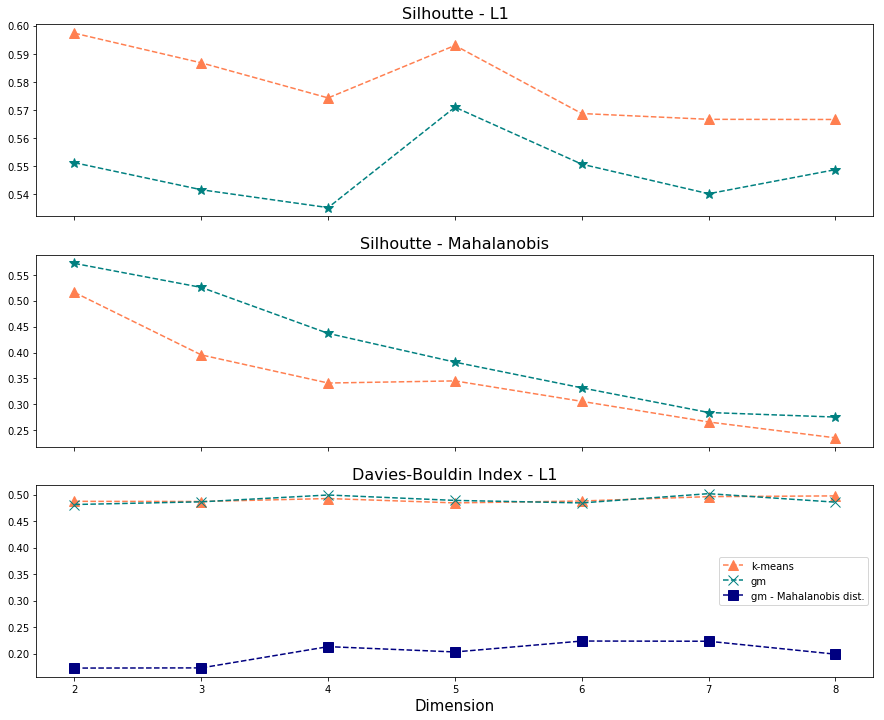

In [74]:
by_dim_df_kmeans = scores[scores['Algorithm'] == 'Kmeans'].groupby('Dimension').mean()
by_dim_df_gm = scores[scores['Algorithm'] == 'GM'].groupby('Dimension').mean()

fig, ax = plt.subplots(3, 1, figsize=(15, 12), sharex=True)

ax[0].set_title('Silhoutte - L1', fontsize=16)
ax[0].plot(by_dim_df_kmeans['Silhouette-L1'], '--^', color='coral', markersize=10, label='k-means');
ax[0].plot(by_dim_df_gm['Silhouette-L1'], '--*', color='teal', markersize=10,  label='gm');

ax[1].set_title('Silhoutte - Mahalanobis', fontsize=16)
ax[1].plot(by_dim_df_kmeans['Silhouette-Mahalanobis'], '--^', color='coral', markersize=10, label='k-means');
ax[1].plot(by_dim_df_gm['Silhouette-Mahalanobis'], '--*', color='teal', markersize=10,  label='gm');

ax[2].set_title('Davies-Bouldin Index - L1', fontsize=16)
ax[2].plot(by_dim_df_kmeans['Davies-Bouldin-L1'], '--^', color='coral', markersize=10, label='k-means');
ax[2].plot(by_dim_df_gm['Davies-Bouldin-L1'], '--x', color='teal', markersize=10, label='gm');
ax[2].plot(by_dim_df_gm['Davies-Bouldin-Mahalanobis'], '--s', color='navy', markersize=10, label='gm - Mahalanobis dist.');

plt.xlabel("Dimension", fontsize=15);
plt.legend();

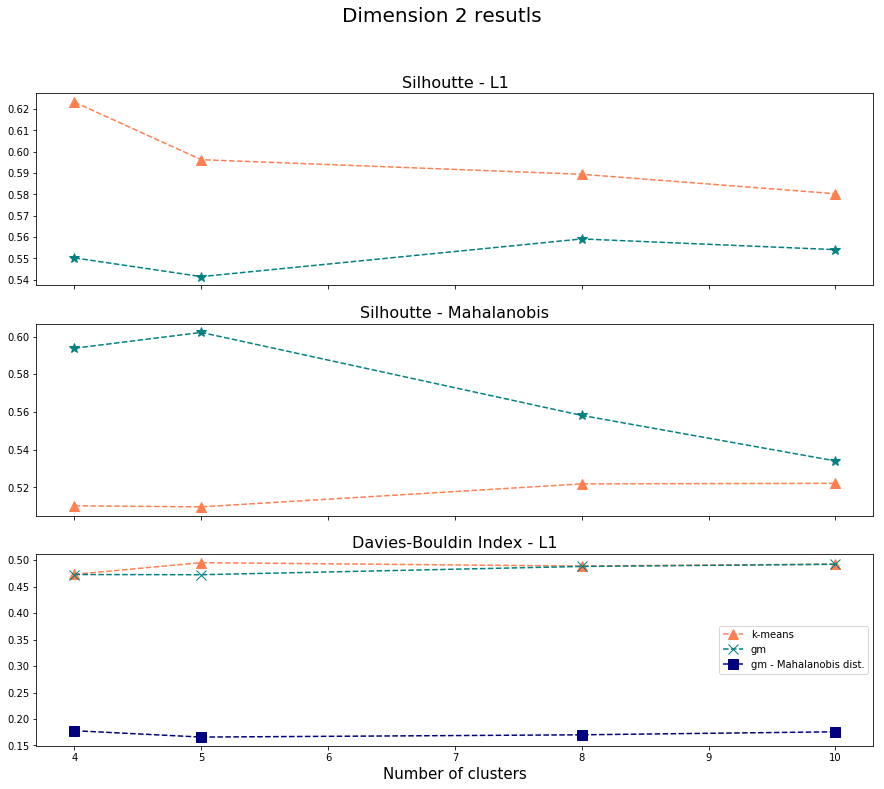

In [78]:
one_dime = 2
by_nb_comps_df_kmeans = scores[(scores['Algorithm'] == 'Kmeans') & (scores['Dimension'] == one_dime)].groupby('Components').mean()
by_nb_comps_df_gm = scores[(scores['Algorithm'] == 'GM') & (scores['Dimension'] == one_dime)].groupby('Components').mean()

fig, ax = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle("Dimension {:d} resutls".format(one_dime), fontsize=20)

ax[0].set_title('Silhoutte - L1', fontsize=16)
ax[0].plot(by_nb_comps_df_kmeans['Silhouette-L1'], '--^', color='coral', markersize=10, label='k-means');
ax[0].plot(by_nb_comps_df_gm['Silhouette-L1'], '--*', color='teal', markersize=10,  label='gm');

ax[1].set_title('Silhoutte - Mahalanobis', fontsize=16)
ax[1].plot(by_nb_comps_df_kmeans['Silhouette-Mahalanobis'], '--^', color='coral', markersize=10, label='k-means');
ax[1].plot(by_nb_comps_df_gm['Silhouette-Mahalanobis'], '--*', color='teal', markersize=10,  label='gm');

ax[2].set_title('Davies-Bouldin Index - L1', fontsize=16)
ax[2].plot(by_nb_comps_df_kmeans['Davies-Bouldin-L1'], '--^', color='coral', markersize=10, label='k-means');
ax[2].plot(by_nb_comps_df_gm['Davies-Bouldin-L1'], '--x', color='teal', markersize=10, label='gm');
ax[2].plot(by_nb_comps_df_gm['Davies-Bouldin-Mahalanobis'], '--s', color='navy', markersize=10, label='gm - Mahalanobis dist.');

plt.xlabel("Number of clusters", fontsize=15);
plt.legend();

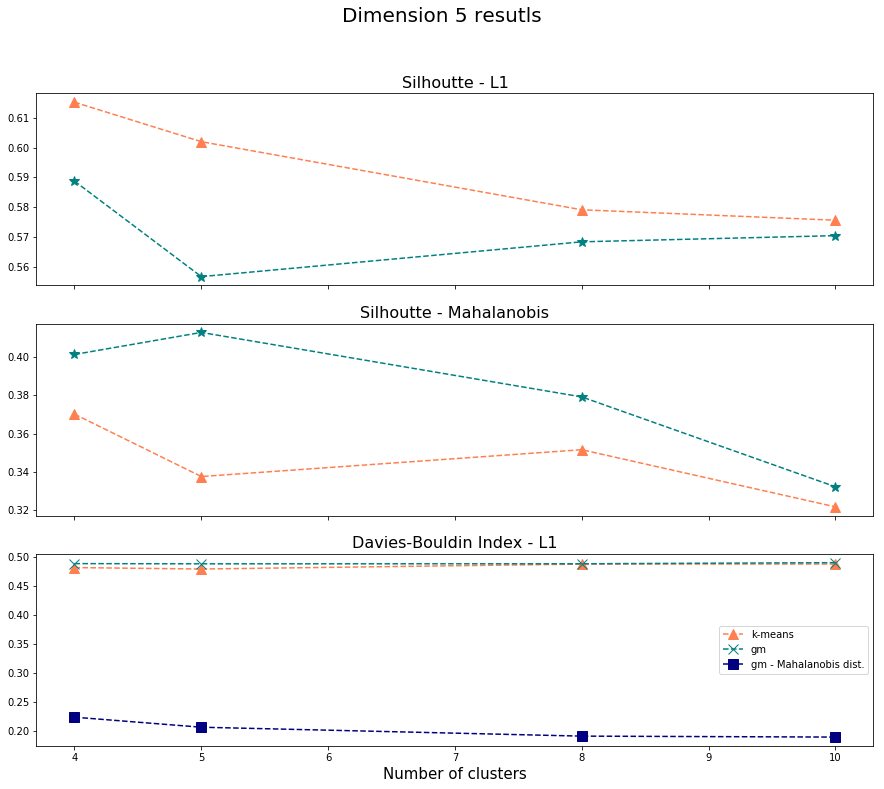

In [79]:
one_dime = 5
by_nb_comps_df_kmeans = scores[(scores['Algorithm'] == 'Kmeans') & (scores['Dimension'] == one_dime)].groupby('Components').mean()
by_nb_comps_df_gm = scores[(scores['Algorithm'] == 'GM') & (scores['Dimension'] == one_dime)].groupby('Components').mean()

fig, ax = plt.subplots(3, 1, figsize=(15, 12), sharex=True)
fig.suptitle("Dimension {:d} resutls".format(one_dime), fontsize=20)

ax[0].set_title('Silhoutte - L1', fontsize=16)
ax[0].plot(by_nb_comps_df_kmeans['Silhouette-L1'], '--^', color='coral', markersize=10, label='k-means');
ax[0].plot(by_nb_comps_df_gm['Silhouette-L1'], '--*', color='teal', markersize=10,  label='gm');

ax[1].set_title('Silhoutte - Mahalanobis', fontsize=16)
ax[1].plot(by_nb_comps_df_kmeans['Silhouette-Mahalanobis'], '--^', color='coral', markersize=10, label='k-means');
ax[1].plot(by_nb_comps_df_gm['Silhouette-Mahalanobis'], '--*', color='teal', markersize=10,  label='gm');

ax[2].set_title('Davies-Bouldin Index - L1', fontsize=16)
ax[2].plot(by_nb_comps_df_kmeans['Davies-Bouldin-L1'], '--^', color='coral', markersize=10, label='k-means');
ax[2].plot(by_nb_comps_df_gm['Davies-Bouldin-L1'], '--x', color='teal', markersize=10, label='gm');
ax[2].plot(by_nb_comps_df_gm['Davies-Bouldin-Mahalanobis'], '--s', color='navy', markersize=10, label='gm - Mahalanobis dist.');

plt.xlabel("Number of clusters", fontsize=15);
plt.legend();

***Comment:*** Based on the observation, it is fairly logical to suppose, that comparison over dimension is not congruent, as results over different number of searched components are mixed between each other. So, such chart depicts rather tendency of a L-1 distance to grow with dimension, equally as indicating tendency of Mahalanobis distance to shrink, possibly due to the expansion of covariance matrix.

Nonetheless, comparison of scores with fixed dimension leads to an assumption that a kind of trade-off between Davies-Bouldin Index and Silhouette is present. Higher number of clusters seems to be diminishing the value of both first *(good)* and second *(bad)* ones.